# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# TODO - code!
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  counts = 0
  prob_drunk_prior_one = 0
  prob_drunk_prior_two = 0
  while(counts < 4):
    counts = counts + 1
    prob_drunk_nonuser = 1 - prob_drunk_prior
    prob_drunk_prior = (true_positive_rate*prob_drunk_prior) / ((true_positive_rate*prob_drunk_prior) + (false_positive_rate*prob_drunk_nonuser))
    if counts == 1:
      prob_drunk_prior_one = prob_drunk_prior
    elif counts == 2:
      prob_drunk_prior_two = prob_drunk_prior
  return print('one positive breathalyzer test:', prob_drunk_prior_one, '\ntwo positive breathalyzer tests:', prob_drunk_prior_two, '\npositive breathalyzer > 95%:', prob_drunk_prior, 'with', counts, 'tests')

x = prob_drunk_given_positive(1/1000, .08, 1)

one positive breathalyzer test: 0.012357884330202669 
two positive breathalyzer tests: 0.13525210993291495 
positive breathalyzer > 95%: 0.9606895076105054 with 4 tests


# **Explore scipy.stats.bayes_mvs**

In [0]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-01-22 22:26:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2020-01-22 22:26:29 (129 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
#created missing headers
column_headers = ['party', 'handicapped-infants', 'water-project', 
'budget', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups', 
'anti-satellite-ban', 'aid-to-contras', 'mx-missile', 'immigration', 
'synfuels', 'education', 'right-to-sue', 'crime', 'duty-free', 
'south-africa']

In [0]:
# create dataframe, removed current header and replaced with column_headers, replaced "?" with nans
df = pd.read_csv('house-votes-84.data',
                 header=None,
                 names=column_headers,
                 na_values = "?")
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
#replaced y's and n's with 1's and 0's
df = df.replace({'y': 1, 'n': 0})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
#split the democrat party to its own dataframe
dem = df[df['party'] == 'democrat']
dem.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [0]:
#bug, ignore
def confidence_interval(data1, confidence=.95):
  data = data1[~np.isnan(data1)]
  mean = np.mean(data)
  n = len(data)
  s = np.std(data, ddof=1)
  stderr = s / np.sqrt(n)
  margin_of_error = stderr * stats.t.ppf((1 + confidence), 2.0, n - 1)
  return (mean, mean - margin_of_error, mean + margin_of_error)


In [0]:
confidence_interval(dem['budget'])

(0.8884615384615384, nan, nan)

In [0]:
#Using the bayesian confidence interval function to out the confidence interval
test = dem['budget']
data = test[~np.isnan(test)]
bayesian_confidence_interval, _, _ = stats.bayes_mvs(data, alpha=.95)
print(bayesian_confidence_interval)


Mean(statistic=0.8884615384615384, minmax=(0.8499435153340716, 0.9269795615890052))


In [0]:
#displays the min max in a tuple
bayesian_confidence_interval.minmax

(0.8499435153340716, 0.9269795615890052)

In [0]:
#displays the mean
bayesian_confidence_interval.statistic

0.8884615384615384

Text(0.5, 1.0, 'Percent of democrats that voted yes on the budget bill')

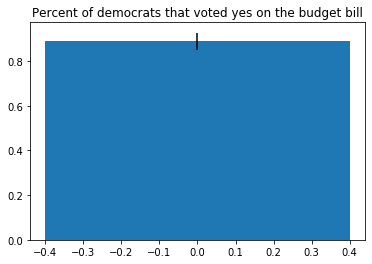

In [0]:
#creates a plot of the mean and its confidence interval
fig, ax = plt.subplots()
ax.bar(x=0, height=bayesian_confidence_interval.statistic, yerr=bayesian_confidence_interval.minmax[1] - bayesian_confidence_interval[0])
ax.set_title("Percent of democrats that voted yes on the budget bill")

In [0]:
#The nth k-statistic
stats.kstat(data)

0.09948024948024949

In [0]:
#unbaised k-stat
stats.kstatvar(data)

0.00023425617134928585

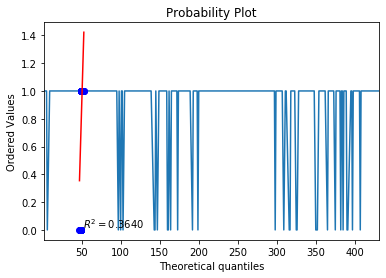

In [0]:
#idk lol
stats.probplot(x=data, sparams=(50), dist='norm', fit=True, plot=data.plot(), rvalue=True);

Bayesian:
*   Have contained prior information on the data you are observing
*   The data and hypothesis contains probabilitys
*   Ex: A doctor looks at a sick patient and checks his background and uses that data and the data that is currently avaliable to create a hypothesis of what his sickness could be.

Frequentist:
*   Does not have prior knowledge of the data they are observing
*   Does not have a posterier (Hypothesis based off evidence of the equation)
*   Only works with the data provided
*   Ex: A doctor looks at a sick patient and checks for symptomes that can currently be observed without looking at any background from the patient

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!